In [1]:
import numpy as np
import cmath

# Defining parameters
C = 299792458 # Speed of light
A = 1 # scaling factor
L1 = 0.6 # distance of blade roots from centre of rotation
L2 = 0.75 # distance of blade tips from centre of rotation
N = 4 # number of blades
R = 30 # range of center of rotation
V = 4.5 # velocity of the center of rotation with respect to the radar
fc = 10**10 # transmitted frequency
theta = np.pi / 6
lmbda = C / fc
f_rot = 100

fs = 8000
points = 2048

In [2]:
t = np.linspace(0, 0.01, points)

In [3]:
def phi(t, propeller_char, radar_char):
    N, L1, L2, f_rot = propeller_char
    lmbda, theta, fs = radar_char
    
    rotor_effect = np.zeros(len(t), dtype='complex128')
    
    for n in range(N - 1):
        rotor_effect += np.exp(-1j * (4*np.pi / lmbda) * ((L1 + L2) / 2) * np.cos(theta) * np.sin(2 * np.pi * f_rot * t + (2 * np.pi * n) / N)) * \
                        np.sinc((4 * np.pi / lmbda) * ((L2 - L1) / 2) * np.cos(theta) * np.sin(2 * np.pi * (f_rot * t + n / N)))
        
    return A * np.exp(1j * (2 * np.pi * fc * t - (4 * np.pi / lmbda) * (R + V * t))) * rotor_effect

In [4]:
propeller_char = (N, L1, L2, f_rot)
radar_char = (lmbda, theta, fs)

phi1 = phi(t, propeller_char, radar_char)

/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


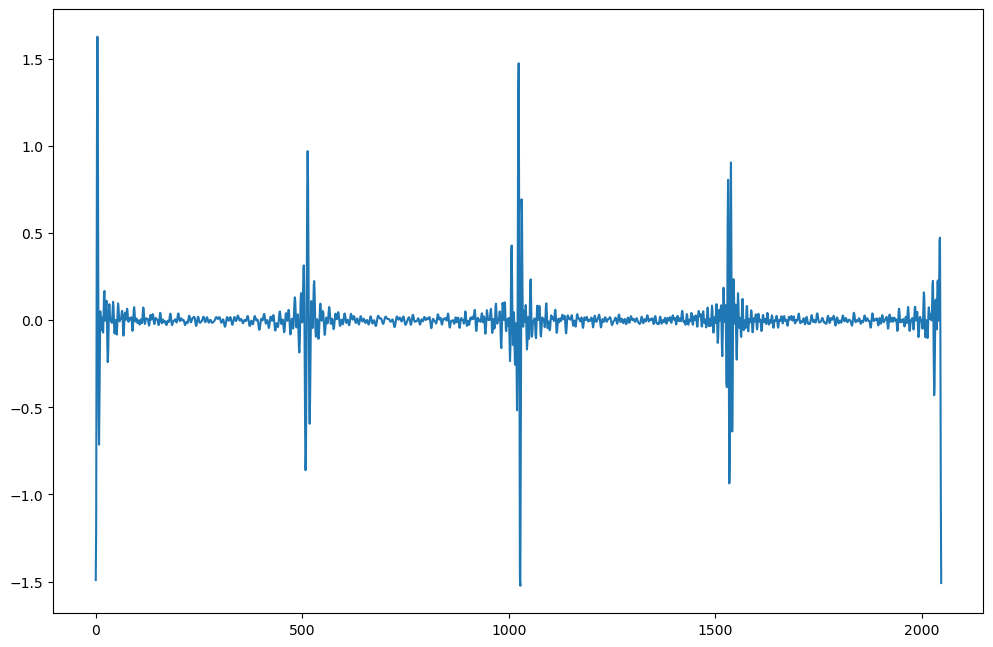

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')

plt.plot(phi1)
plt.show()

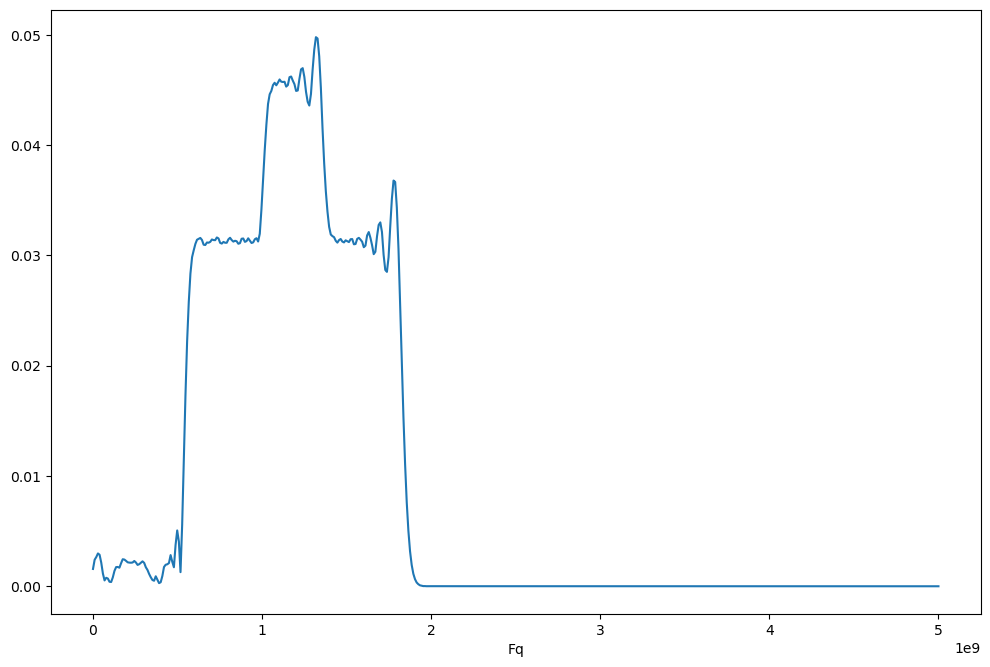

In [91]:
from scipy import signal

f, Pxx_spec = signal.welch(np.real(phi1), fs, 'flattop', 1024, scaling='spectrum')

plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
plt.plot(f, np.sqrt(Pxx_spec))
plt.xlabel('Fq')
plt.show()